SHAPE OF DATA= (891, 12)

_____________________

 Null Values in data:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

_____________________

 Duplicate rows in data= 0

_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Missing Values After Filling:
 PassengerId    0
Survived       0
Pclass         

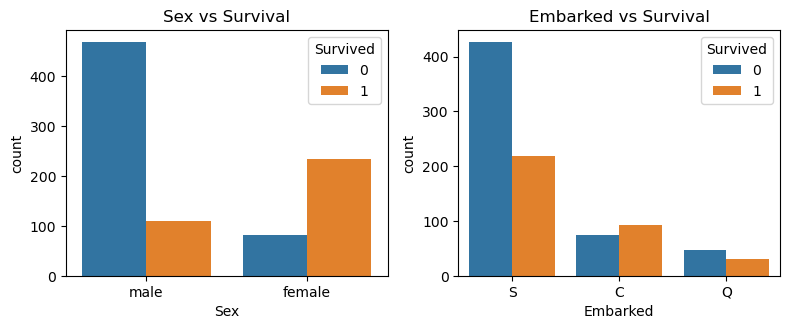

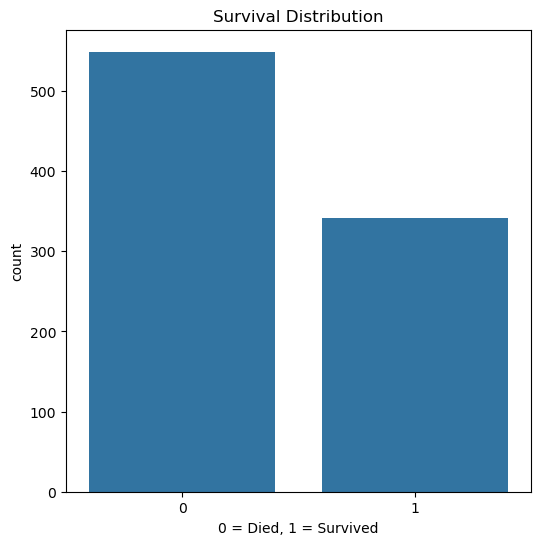

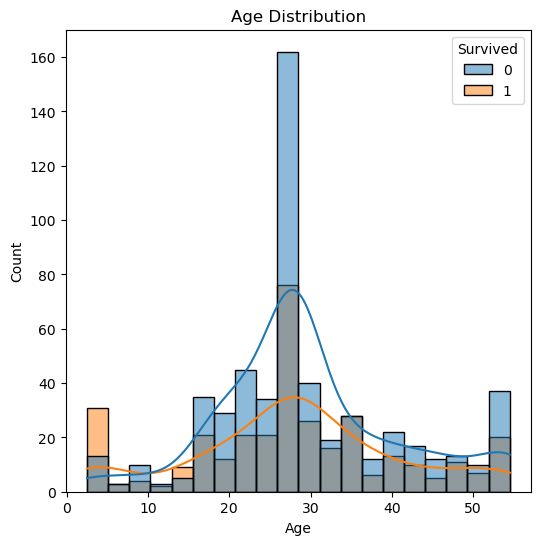

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3.0,22.0,1.0,0.0,7.2500,True
1,1,1.0,38.0,1.0,0.0,65.6344,False
2,1,3.0,26.0,0.0,0.0,7.9250,False
3,1,1.0,35.0,1.0,0.0,53.1000,False
4,0,3.0,35.0,0.0,0.0,8.0500,True


LOGISTIC REGRESSION RESULT
ACCURACY= 0.8022388059701493

Classification Report=
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


Confusion_matrix=
 [[135  22]
 [ 31  80]]

DECISION TREE RESULT
ACCURACY= 0.7574626865671642

Classification Report=
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.73      0.67      0.69       111

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268


Confusion_matrix=
 [[129  28]
 [ 37  74]]

RANDOM FOREST RESULT
ACCURACY= 0.8134328358208955

Classification Report=
               precision    

In [2]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display settings
pd.set_option('display.max_columns', None)

# ===============================
# 2. Load Data
# ===============================
df = pd.read_csv("train.csv")

print("SHAPE OF DATA=", df.shape)
print("\n_____________________")
print("\n Null Values in data:\n", df.isnull().sum().sort_values(ascending=False))
print("\n_____________________")
print("\n Duplicate rows in data=", df.duplicated().sum())
print("\n_____________________")
print(df.info())
display(df.head())
print(df.describe())

# ===============================
# 3. Data Cleaning
# ===============================
# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors="coerce")

# Survived as categorical
df['Survived'] = df['Survived'].astype('category')

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing Values After Filling:\n", df.isnull().sum())

# ===============================
# 4. Outlier Handling (Winsorization)
# ===============================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

# Cap outliers
for cols in num_cols:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[cols] = np.where(df[cols] < lower_bound, lower_bound,
                        np.where(df[cols] > upper_bound, upper_bound, df[cols]))

# Count remaining outliers
for cols in num_cols:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Outlier = (df[cols] < lower_bound) | (df[cols] > upper_bound)
    print(f"{cols:<12} | Number of outliers = {Outlier.sum()}")

# ===============================
# 5. EDA
# ===============================
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Sex vs Survival")

plt.subplot(2, 2, 2)
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Embarked vs Survival")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.xlabel("0 = Died, 1 = Survived")
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(x="Age", kde=True, bins=20, hue="Survived", data=df)
plt.title("Age Distribution")
plt.show()

# ===============================
# 6. Feature Engineering
# ===============================
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.drop(['Embarked'], axis=1, inplace=True)

display(df.head())

# ===============================
# 7. Train-Test Split
# ===============================
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

# ===============================
# 8. Logistic Regression
# ===============================
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

print("LOGISTIC REGRESSION RESULT")
print("ACCURACY=", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report=\n", classification_report(y_test, y_pred_scaled))
print("\nConfusion_matrix=\n", confusion_matrix(y_test, y_pred_scaled))

# ===============================
# 9. Decision Tree
# ===============================
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)

print("\nDECISION TREE RESULT")
print("ACCURACY=", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report=\n", classification_report(y_test, y_pred_dt))
print("\nConfusion_matrix=\n", confusion_matrix(y_test, y_pred_dt))

# ===============================
# 10. Random Forest
# ===============================
model_rf = RandomForestClassifier(n_estimators=30, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

print("\nRANDOM FOREST RESULT")
print("ACCURACY=", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report=\n", classification_report(y_test, y_pred_rf))
print("\nConfusion_matrix=\n", confusion_matrix(y_test, y_pred_rf))

# ===============================
# 11. kNN Classifier
# ===============================
model_kn = KNeighborsClassifier(n_neighbors=9)
model_kn.fit(X_train_scaled, y_train)
y_pred_kn = model_kn.predict(X_test_scaled)

print("\nkNN RESULT")
print("ACCURACY=", accuracy_score(y_test, y_pred_kn))
print("\nClassification Report=\n", classification_report(y_test, y_pred_kn))
print("\nConfusion_matrix=\n", confusion_matrix(y_test, y_pred_kn))

# ===============================
# 12. Random Forest Grid Search
# ===============================
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring="accuracy",
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nTUNED RANDOM FOREST RESULT")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
